<a href="https://colab.research.google.com/github/TheProgrammingArchive/EmotionDetection/blob/main/Age_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.utils import img_to_array
import matplotlib.pyplot as plt

X_labels, y_labels = [], []
for images in os.listdir('/content/drive/utkface_aligned_cropped/UTKFace'):
  img = cv2.imread(f'/content/drive/utkface_aligned_cropped/UTKFace/{images}', cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (48, 48))

  img_arr = img_to_array(img)

  y_labels.append(images.split('_')[0])
  X_labels.append(img_arr)

In [ ]:
len(X_train), len(y_train)

(19000, 19000)

In [ ]:
X_train, y_train = X_labels[0:19000], y_labels[0:19000]
X_test, y_test = X_labels[19000:len(X_labels)], y_labels[19000:len(y_labels)]

26


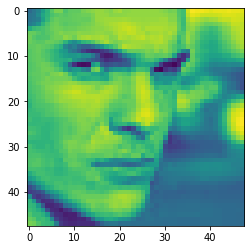

In [ ]:
plt.imshow(np.squeeze(X_train[434]))
print(y_train[434])

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='relu'),
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['mae'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_data = train_datagen.flow(x=np.asarray(X_train), y=y_train, batch_size=32)

test_datagen = ImageDataGenerator(rescale=1/255)
test_data = test_datagen.flow(np.asarray(X_test), y_test, batch_size=32)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_28 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_12 (Bat  (None, 44, 44, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 22, 22, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 20, 20, 128)      

In [ ]:
model.fit(train_data, validation_data=test_data, epochs=50, steps_per_epoch=train_data.n//train_data.batch_size, validation_steps=test_data.n//test_data.batch_size)

Epoch 1/50
593/593 [==============================] - 15s 24ms/step - loss: 345.1856 - mae: 13.8811 - val_loss: 331.5027 - val_mae: 14.7113
Epoch 2/50
593/593 [==============================] - 14s 24ms/step - loss: 208.3714 - mae: 10.7631 - val_loss: 345.8792 - val_mae: 13.4171
Epoch 3/50
593/593 [==============================] - 14s 24ms/step - loss: 162.9843 - mae: 9.4379 - val_loss: 135.7155 - val_mae: 8.3539
Epoch 4/50
593/593 [==============================] - 15s 26ms/step - loss: 143.5459 - mae: 8.8273 - val_loss: 131.5305 - val_mae: 8.2651
Epoch 5/50
593/593 [==============================] - 14s 24ms/step - loss: 129.4016 - mae: 8.3725 - val_loss: 202.3832 - val_mae: 11.1621
Epoch 6/50
593/593 [==============================] - 14s 24ms/step - loss: 123.3668 - mae: 8.0910 - val_loss: 126.7820 - val_mae: 8.0723
Epoch 7/50
593/593 [==============================] - 14s 24ms/step - loss: 113.5288 - mae: 7.7967 - val_loss: 94.9262 - val_mae: 7.1280
Epoch 8/50
593/593 [==========

In [ ]:
model.evaluate(test_data)

148/148 [==============================] - 1s 7ms/step - loss: 65.5842 - mae: 5.6375


[65.58424377441406, 5.6374945640563965]

In [ ]:
model.save('/content/age', save_format='h5')